In [ ]:
# Projeto Marinha do Brasil

# Autor: Natanael Junior (natmourajr@gmail.com)
# Laboratorio de Processamento de Sinais - UFRJ


In [1]:
import os
import pickle
import numpy as np
import time

init_time = time.time()

from sklearn import preprocessing
from sklearn import cross_validation
from sklearn.externals import joblib

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.handlelength'] = 3
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['ytick.labelsize'] = 18

%matplotlib inline

m_time = time.time()
print 'Time to import all libraries: '+str(m_time-init_time)+' seconds'

outputpath = os.environ['OUTPUTDATAPATH']
main_analysis_path = os.environ['SONAR_WORKSPACE']
analysis_path = outputpath+'/StationarityAnalysis'
pict_path = analysis_path+'/picts'


m_time = time.time()


subfolder = '4classes'
n_pts_fft = 1024
decimation_rate = 3

if(not os.path.exists(outputpath+'/'+'LofarData_%s_%i_fft_pts_%i_decimation_rate.jbl'%(
            subfolder,n_pts_fft,decimation_rate))):
    print outputpath+'/'+'LofarData_%s_%i_fft_pts_%i_decimation_rate.pickle'%(
        subfolder,n_pts_fft,decimation_rate)+' doesnt exist...please create it'
    exit()
    
#Read lofar data
[data,class_labels] = joblib.load(outputpath+'/'+'LofarData_%s_%i_fft_pts_%i_decimation_rate.jbl'%(
            subfolder,n_pts_fft,decimation_rate))
m_time = time.time()-m_time
print 'Time to read data file: '+str(m_time)+' seconds'


Time to import all libraries: 1.4345369339 seconds
Time to read data file: 1.63777399063 seconds


# Show Freq Distributions
This plot represents the freq distributions

In [ ]:
# Show Window Distributions
from mpl_toolkits.mplot3d import Axes3D
fig, subplot_array = plt.subplots(nrows=2, ncols=2,figsize=(20,15))

m_colors = ['b', 'r', 'g', 'y']

bins = np.linspace(-1,1,200)
ax = {}

for iclass, iclass_label in enumerate(class_labels):
    print 'Processing Class: %s' % (iclass_label)
    
    ax[iclass] = plt.subplot(2,2,iclass+1, projection='3d')
    #ax = plt.subplot(2,2,iclass+1)
    m_fontsize = 18
    plt.title('Class: %s - Lofar Distribution'%(iclass_label), fontsize= m_fontsize, fontweight="bold")
    ax[iclass].set_xlabel('Frequency (Hz)', fontsize= m_fontsize, fontweight="bold")
    ax[iclass].set_ylabel('# Windows', fontsize= m_fontsize, fontweight="bold")
    ax[iclass].set_zlabel('Occurrences', fontsize= m_fontsize, fontweight="bold")
    
    ax[iclass].xaxis.labelpad = 20
    ax[iclass].yaxis.labelpad = 20
    
    # access run information
    sum_events = 0
    event_aux = 0
    for irun in range(len(data[iclass])):
        qtd_runs = len(data[iclass])
        # access data from the window data vector
        print 'Processing irun: ', irun, ' - Number of Events: ', data[iclass][irun]['Signal'].shape[1]
        bins = np.linspace(0,2870,data[iclass][irun]['Signal'].shape[0])
        bins_width = 7350.0/1024.0
        qtd_events = data[iclass][irun]['Signal'].shape[1]
        
        for ievent in range(0,qtd_events,qtd_events/10):
            #print 'ievent: ', ievent
            event = data[iclass][irun]['Signal'][:,ievent]
            event = event/event.sum()
            ax[iclass].bar(bins,event,zs=sum_events+ievent
                           ,zdir='y',width=bins_width,color=m_colors[iclass], linewidth=0)

             # for events
            #break
        # for runs
        sum_events = sum_events+qtd_events
        #break
    # for classes
    #break
if False:
    # Saving processing
    for angle in range(0,181,10):
        for iclass, iclass_label in enumerate(class_labels):
            #print 'Rotating Class: ',iclass_label
            ax[iclass].view_init(30,angle)
        pict_name = pict_path+'/'+'KLDivInFreq_%s_%i_fft_pts_%i_decimation_rate_FreqDists_%i_angle'%(
            subfolder,n_pts_fft,decimation_rate, angle)
        print 'Creating pict for angle: ', angle, ' picture'
        plt.savefig(pict_name+'.png')
        plt.savefig(pict_name+'.pdf')


for iclass, iclass_label in enumerate(class_labels):
    ax[iclass].view_init(30,120)
    
pict_name = pict_path+'/'+'KLDivInFreq_%s_%i_fft_pts_%i_decimation_rate_FreqDists.pdf'%(
            subfolder,n_pts_fft,decimation_rate)
plt.savefig(pict_name)    

Processing Class: ClassA
Processing irun:  0  - Number of Events:  863


Processing Class: ClassA
Processing run: 0 of 5
Processing run: 1 of 5
Processing run: 2 of 5
Processing run: 3 of 5
Processing run: 4 of 5
Processing Class: ClassB
Processing run: 0 of 10
Processing run: 1 of 10
Processing run: 2 of 10
Processing run: 3 of 10
Processing run: 4 of 10
Processing run: 5 of 10
Processing run: 6 of 10
Processing run: 7 of 10
Processing run: 8 of 10
Processing run: 9 of 10
Processing Class: ClassC
Processing run: 0 of 9
Processing run: 1 of 9
Processing run: 2 of 9
Processing run: 3 of 9
Processing run: 4 of 9
Processing run: 5 of 9
Processing run: 6 of 9
Processing run: 7 of 9
Processing run: 8 of 9
Processing Class: ClassD
Processing run: 0 of 10
Processing run: 1 of 10
Processing run: 2 of 10
Processing run: 3 of 10
Processing run: 4 of 10
Processing run: 5 of 10
Processing run: 6 of 10
Processing run: 7 of 10
Processing run: 8 of 10
Processing run: 9 of 10
Showing Class: ClassA
Showing Class: ClassB
Showing Class: ClassC
Showing Class: ClassD


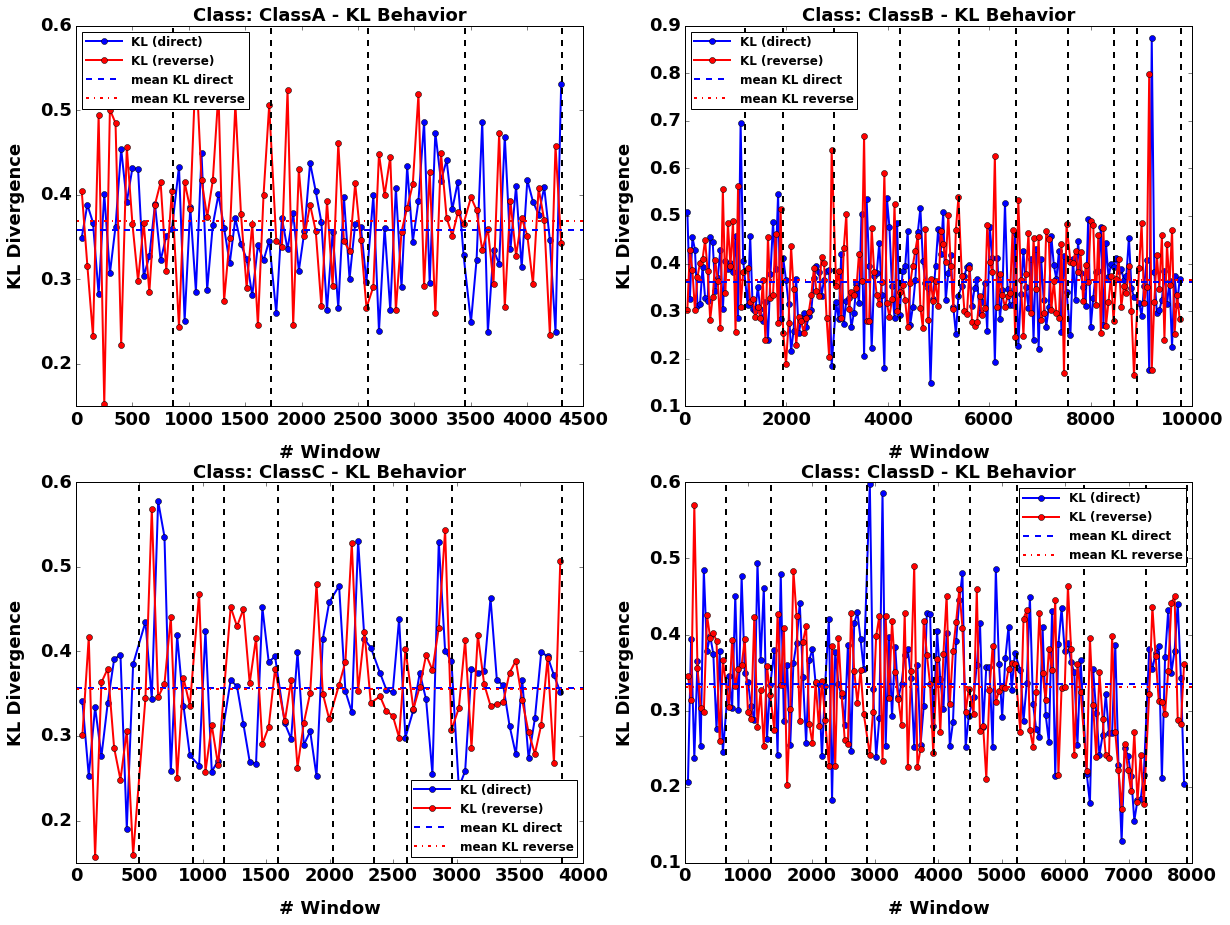

In [11]:
# Draw KL Divergence for 2 consecutive windows

from Functions import StatFunctions as stats
fig, subplot_array = plt.subplots(nrows=2, ncols=2,figsize=(20,15))
m_colors = ['b', 'r', 'g', 'y']

pdfs = {}
windows_per_run = {}
sum_windows_per_run = {}

analysis_step = 50 # time safe

for iclass, iclass_label in enumerate(class_labels):
    print 'Processing Class: %s' % (iclass_label)

    pdfs[iclass] = {}
    windows_per_run[iclass] = {}
    sum_windows_per_run[iclass] = {}
    
    for irun in range(len(data[iclass])):
        qtd_runs = len(data[iclass])
        
        print 'Processing run: %i of %i' %(irun, qtd_runs)
        
        bins = np.linspace(0,2870,data[iclass][irun]['Signal'].shape[0])
        bins_width = 7350.0/1024.0
        
        pdfs[iclass][irun] = {}
        
        qtd_windows = data[iclass][irun]['Signal'].shape[1]
        
        for ievent in range(0,qtd_windows,analysis_step):
            event = data[iclass][irun]['Signal'][:,ievent]
            event = event/event.sum()
            pdfs[iclass][irun][ievent] = event
        windows_per_run[iclass][irun] = qtd_windows
        if irun == 0:
            sum_windows_per_run[iclass][irun] = qtd_windows
        else:
            sum_windows_per_run[iclass][irun] = sum_windows_per_run[iclass][irun-1]+qtd_windows


kl_forward = {}
kl_reverse = {}
iwindow = {}

for iclass, iclass_label in enumerate(class_labels):
    print 'Showing Class: %s' % (iclass_label)
    ax[iclass] = plt.subplot(2,2,iclass+1)
    
    m_fontsize = 18
    plt.title('Class: %s - KL Behavior'%(iclass_label), fontsize= m_fontsize, fontweight="bold")
    ax[iclass].set_xlabel('# Window', fontsize= m_fontsize, fontweight="bold")
    ax[iclass].set_ylabel('KL Divergence', fontsize= m_fontsize, fontweight="bold")

    ax[iclass].xaxis.labelpad = 15
    ax[iclass].yaxis.labelpad = 15
    
    kl_forward[iclass] = []
    kl_reverse[iclass] = []
    
    old_pdf = []
    act_pdf = []
    
    iwindow[iclass] = []
    
    for irun in range(len(data[iclass])):
        qtd_windows = data[iclass][irun]['Signal'].shape[1]
        
        for ievent in range(0,qtd_windows,analysis_step):
            if ievent == 0:
                continue
            old_pdf = pdfs[iclass][irun][ievent-analysis_step]
            act_pdf = pdfs[iclass][irun][ievent]
            
            [kl_forw,trash] = stats.KLDiv(old_pdf,act_pdf)
            [kl_rever, trash] = stats.KLDiv(act_pdf, old_pdf)
            kl_forward[iclass].append(kl_forw)
            kl_reverse[iclass].append(kl_rever)
            
            if irun == 0:
                iwindow[iclass].append(ievent)
            else:
                qtd_window_in_previous_runs = 0
                for jrun in range(0,irun):
                    qtd_window_in_previous_runs = (qtd_window_in_previous_runs+
                                                   data[iclass][jrun]['Signal'].shape[1])
                iwindow[iclass].append(qtd_window_in_previous_runs+ievent)
                
    plt.plot(iwindow[iclass],kl_forward[iclass],color='b',marker='o',label='KL (direct)')
    plt.plot(iwindow[iclass],kl_reverse[iclass],color='r',marker='o',label='KL (reverse)')
    
    x_lim = ax[iclass].get_xlim()
    plt.plot(x_lim, np.mean(kl_forward[iclass])*np.ones_like(x_lim),color='b',linestyle='--',label='mean KL direct')
    plt.plot(x_lim, np.mean(kl_reverse[iclass])*np.ones_like(x_lim),color='r',linestyle='-.',label='mean KL reverse')
    ax[iclass].set_xlim(x_lim)


    plt.legend(loc='best') 
    
    y_lim = ax[iclass].get_ylim()
    for irun in range(len(data[iclass])):
        plt.plot(sum_windows_per_run[iclass][irun]*np.ones_like(y_lim),y_lim,color='k',linestyle='--')

    ax[iclass].set_ylim(y_lim)

pict_name = pict_path+'/'+'KLDivInFreq_%s_%i_fft_pts_%i_decimation_rate_KLDiv.pdf'%(
            subfolder,n_pts_fft,decimation_rate)
plt.savefig(pict_name)

